<a href="https://colab.research.google.com/github/soyab266/test/blob/master/CCA_PART_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np


In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day35-complete-case-analysis/data_science_job.csv')

In [4]:
df.head(2)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0


In [5]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [ ]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [ ]:
df.shape

(19158, 13)

In [13]:
from numpy.ma.core import mean #code to get the columns whose missing value is >0 and <0.05
from numpy.core.fromnumeric import var
cols=[var for var in df.columns if df[var].isnull().mean()<0.05 and df[var].isnull().mean()>0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [15]:
df[cols].sample(3)

,city_development_index,enrolled_university,education_level,experience,training_hours
13646,0.910,no_enrollment,Graduate,16.0,90.0
772,0.884,no_enrollment,Graduate,20.0,70.0
14575,0.920,no_enrollment,Graduate,2.0,54.0


In [17]:
len(df[cols].dropna())/len(df) #just to know how much data available after drop

0.8968577095730244

In [18]:
new_df=df[cols].dropna()

In [19]:
df.shape , new_df.shape

((19158, 13), (17182, 5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9992252fd0>,
      dtype=object)

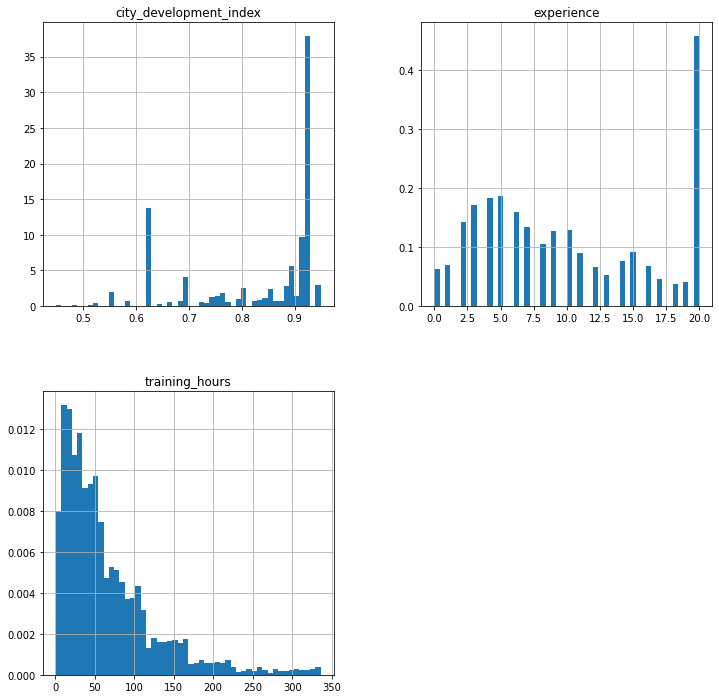

In [23]:
new_df.hist(bins=50,figsize=(12,12),density=True)

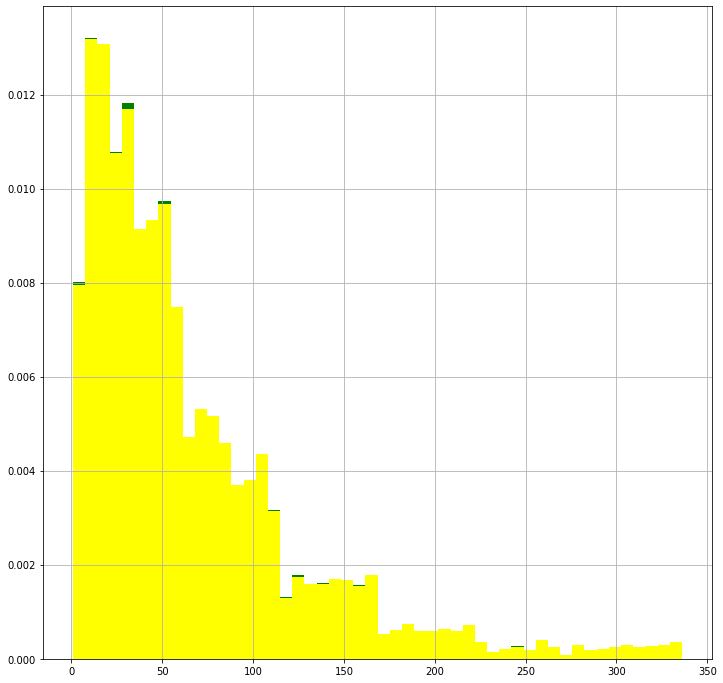

In [25]:
new_df['training_hours'].hist( bins=50,figsize=(12,12),density=True, color= 'green')
df['training_hours'].hist(bins=50, figsize=(12,12), density =True, color='yellow') # comapre before  and after dropping 


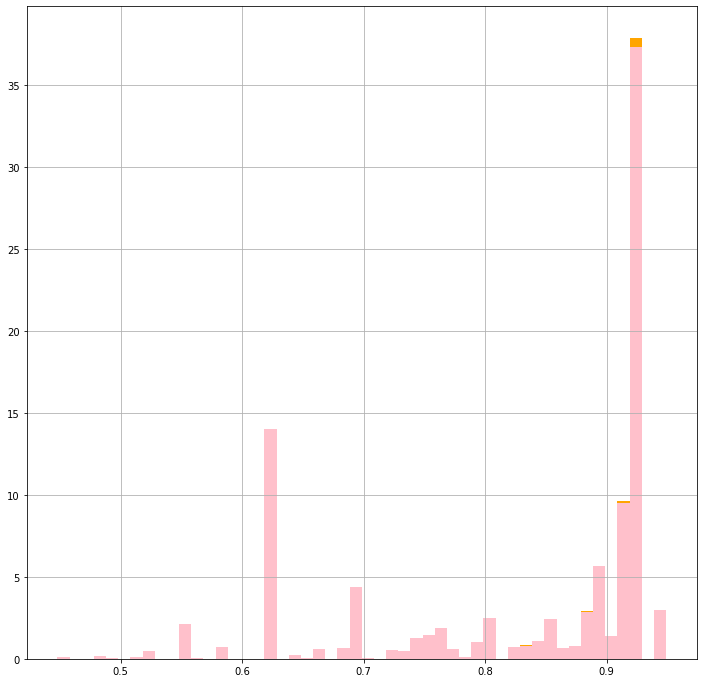

In [26]:
new_df['city_development_index'].hist(bins=50, figsize=(12,12), density=True, color= 'orange')
df['city_development_index'].hist(bins=50, figsize=(12,12), density=True, color= 'pink')

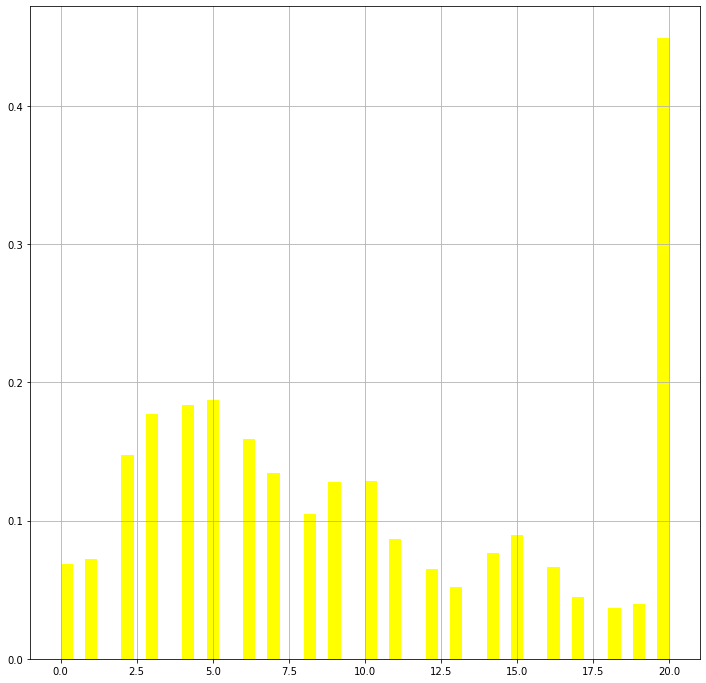

In [30]:
df['experience'].hist(bins=50, figsize=(12,12), density=True, color= 'black')
df['experience'].hist(bins=50, figsize=(12,12), density=True, color= 'yellow')

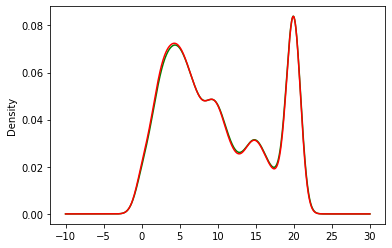

In [34]:
new_df['experience'].plot.density(color='green')# plotting pdf to look the difference before and after dropna= shape of distribution is same.
df['experience'].plot.density(color='red')


In [35]:
df['enrolled_university'].value_counts()

no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

In [36]:
df['education_level'].value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [50]:
temp=pd.concat( [
                new_df['enrolled_university'].value_counts()/len(new_df),
                df['enrolled_university'].value_counts()/len(df)
                ] ,axis=1)
temp
temp.columns=['original', 'cca']
temp

,original,cca
no_enrollment,0.735188,0.721213
Full time course,0.200733,0.196106
Part time course,0.064079,0.062533


In [52]:
temp=pd.concat([
             new_df['education_level'].value_counts()/len(new_df),
             df['education_level'].value_counts()/len(df)

], axis=1)
temp.columns=['old', 'new']
temp

,old,new
Graduate,0.619835,0.605387
Masters,0.234082,0.227633
High School,0.107380,0.105282
Phd,0.022116,0.021610
Primary School,0.016587,0.016077
